In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
penguins_ds = pd.read_csv('penguins_size.csv')
penguins_ds.sample(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
191,Chinstrap,Dream,53.5,19.9,205.0,4500.0,MALE
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
121,Adelie,Torgersen,37.7,19.8,198.0,3500.0,MALE
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE


In [3]:
penguins_ds_missing_values = penguins_ds.isnull().sum()
penguins_ds_missing_values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
penguins_ds_cleaned = penguins_ds.dropna()

In [5]:
penguins_ds_cleaned = penguins_ds_cleaned[penguins_ds_cleaned['sex'].isin(['MALE', 'FEMALE'])]

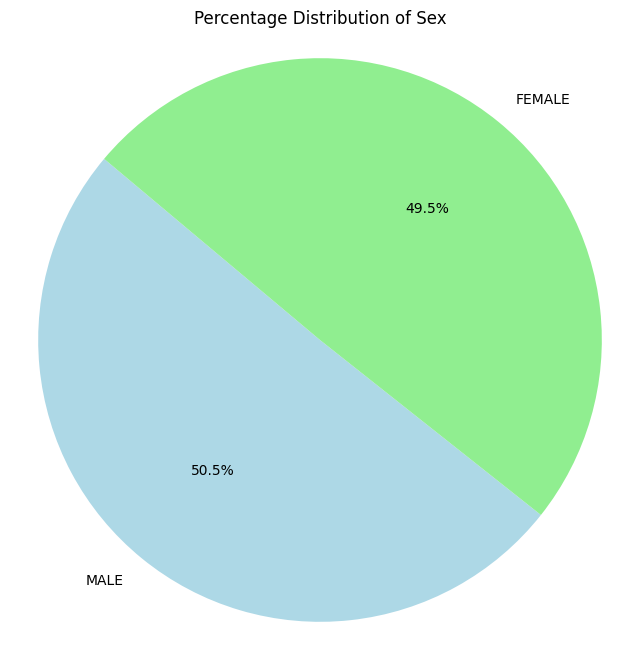

In [6]:
sex_counts = penguins_ds_cleaned['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Percentage Distribution of Sex')
plt.axis('equal')
plt.show()

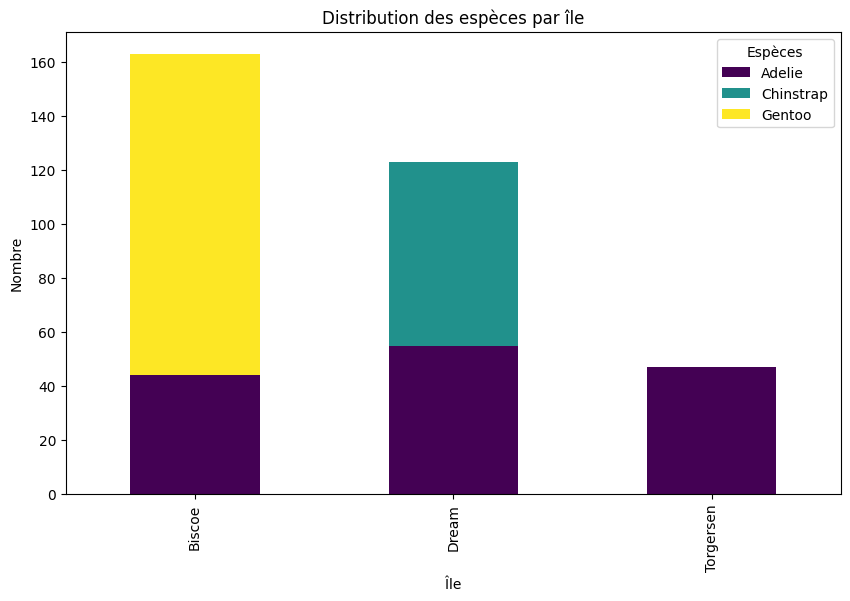

In [7]:
pivot_df = penguins_ds_cleaned.pivot_table(index='island', columns='species', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Distribution des espèces par île')
plt.xlabel('Île')
plt.ylabel('Nombre')
plt.legend(title='Espèces')
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_30580\351140692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_culmen_area, x='species', y='culmen_area_m2', palette='viridis')


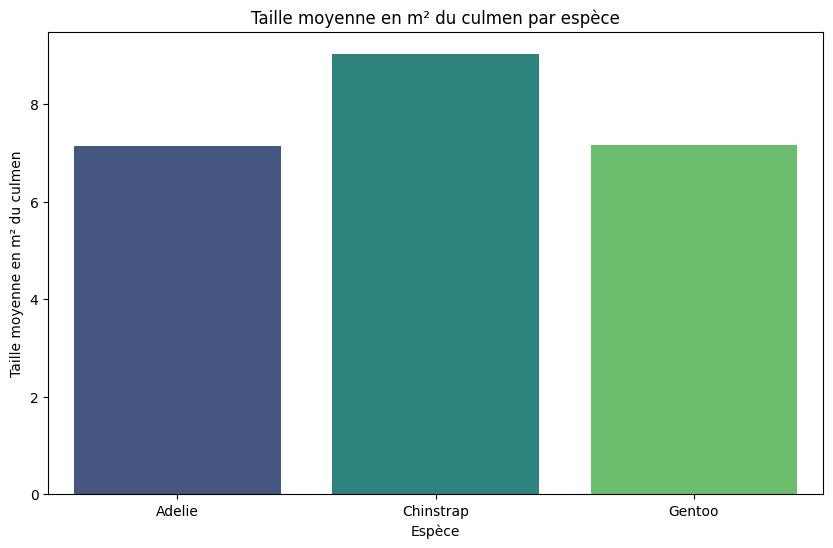

In [ ]:
penguins_ds_cleaned['culmen_area_mm2'] = penguins_ds_cleaned['culmen_length_mm'] * penguins_ds_cleaned['culmen_depth_mm']
penguins_ds_cleaned['culmen_area_m2'] = penguins_ds_cleaned['culmen_area_mm2'] / 100

# Calcule la moyenne de la taille en m² du culmen pour chaque espèce
mean_culmen_area = penguins_ds_cleaned.groupby('species')['culmen_area_m2'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_culmen_area, x='species', y='culmen_area_m2', palette='viridis')
plt.title('Taille moyenne en cm² du culmen par espèce')
plt.xlabel('Espèce')
plt.ylabel('Taille moyenne en cm² du culmen')
plt.show()